We start with the question of finding the best linear function that approximate a given dataset

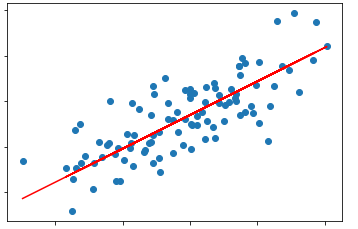

# Method 1: Normal equation

We can directly solve for the best linear function that best fit the data under the Mean Square error metric
$$w^* = \text{argmin}_{w}\frac{1}{2}\|Xw - y\|_2^2$$
differentiate wrt w and set it to 0
\begin{align}
0 &= X^T(Xw^*-y)\\
w^* &= (X^TX)^{-1}X^Ty
\end{align}

(1000, 2) (1000, 1)


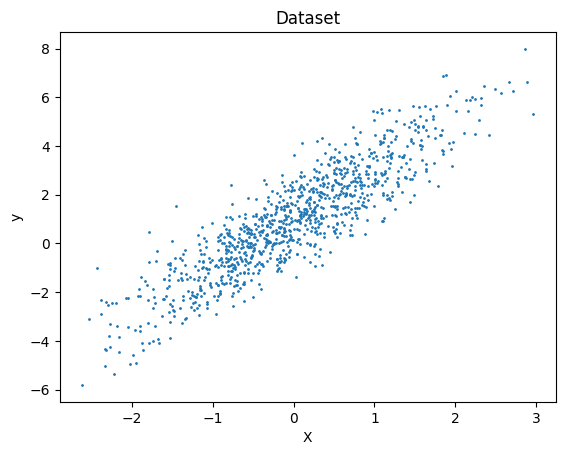

(1000, 2) (1000, 1)


In [ ]:
#@title The data {vertical-output: true}
import numpy as np
import matplotlib.pyplot as plt

_X = np.random.randn(1000, 1)
X = np.concatenate([np.ones_like(_X), _X], axis=-1) # add bias
print(X.shape, _X.shape)
y = _X * 2 + 1 + np.random.randn(*_X.shape)

plt.scatter(_X, y, s=1)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Dataset')
plt.show()
print(X.shape, y.shape)

In [ ]:
#@title Some helper functions
def eval(X, y, w):
    return np.square(X @ w - y).mean()

def plot(_X, y, w):
    plt.scatter(_X,y, s=1)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Dataset')
    x_test = np.linspace(-3, 3, 10)[..., None]
    x_test_pad = np.concatenate([np.ones_like(x_test), x_test], axis=-1)
    y_test = x_test_pad @ w
    plt.plot(x_test, y_test, c='red')
    plt.show()

We implement the above formula for this dataset

[[0.99765438]
 [1.98560612]]


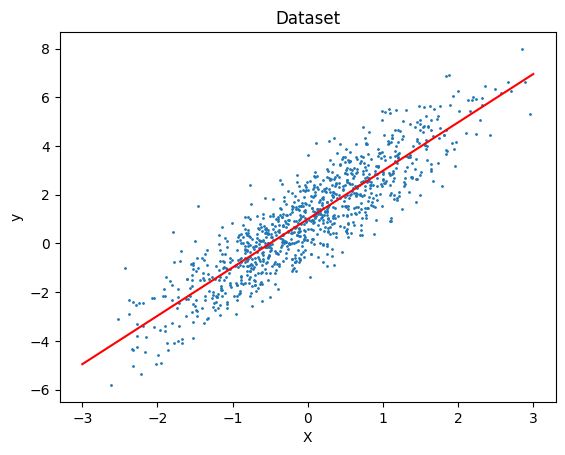

optimal loss: 0.9950500820945456


In [ ]:
#@title Analytical solution {vertical-output: true}
w_star = np.linalg.inv(X.T @ X) @ X.T @ y
print(w_star)
plot(_X, y, w_star)
print("optimal loss:", eval(X, y, w_star))

# Method 2: Gradient descent
Exactly solving for the optimal solution is non-trivial in many practical problems, and the calculation of the inverse matrix is expensive for large dataset. This section examine the gradient descent on the linear regression problem.

final loss: 0.9950500820945456


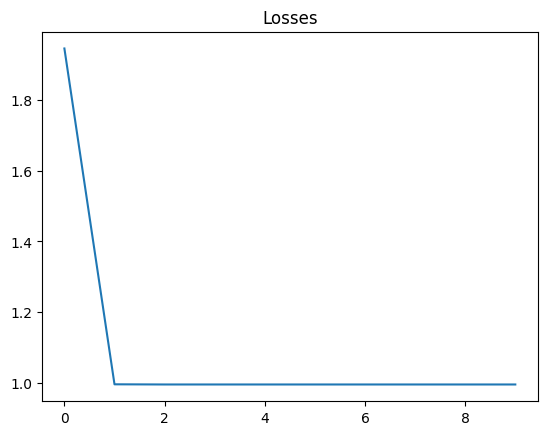

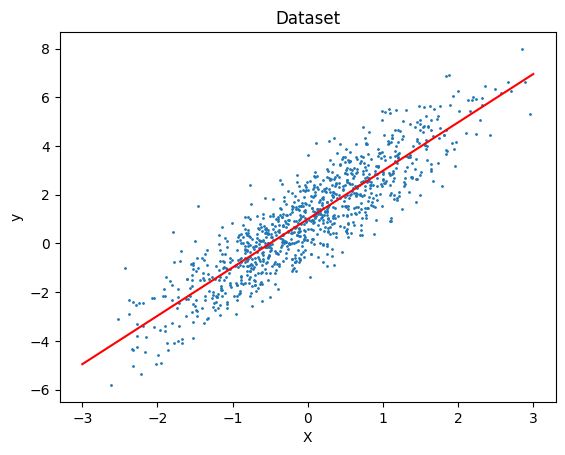

In [ ]:
#@title Full Gradient descent {vertical-output: true}

lr = 1e-3
epoch = 10

losses = []

# init w with all ones
current_w = np.ones((X.shape[-1], 1))

for _ in range(epoch):
    losses.append(eval(X, y, current_w))
    grad = X.T @ (X @ current_w - y)
    current_w -= grad * lr

print("final loss:", eval(X, y, current_w))
plt.plot(losses)
plt.title("Losses")
plt.show()
plot(_X, y, current_w)

The final loss is almost the same as the optimal loss after just one update. Next, we examine with the minibatch stochastic gradient descent algorithm

final loss: 1.0001401286381726


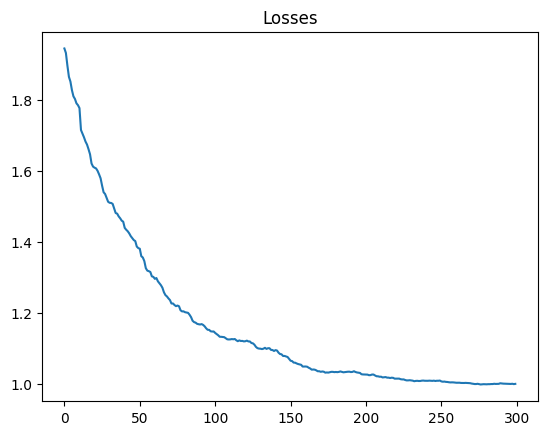

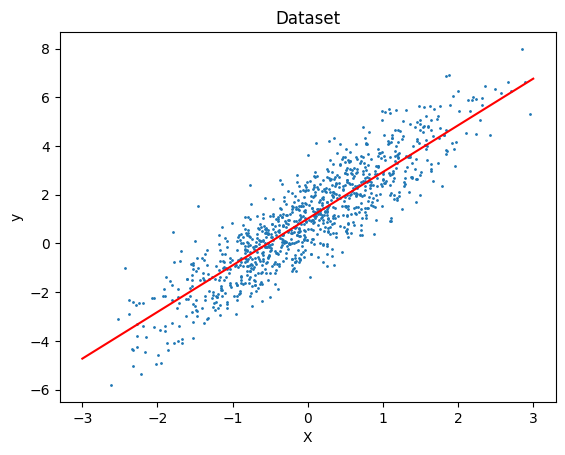

In [ ]:
#@title Minibatch Gradient descent {vertical-output: true}

lr = 1e-3
epoch = 300
batch_size = 10

losses = []

# init w with all ones
current_w = np.ones((X.shape[-1], 1))

for _ in range(epoch):
    indx = np.random.choice(X.shape[0], batch_size)
    X_batch = X[indx]
    y_batch = y[indx]
    losses.append(eval(X, y, current_w))
    grad = X_batch.T @ (X_batch @ current_w - y_batch)
    current_w -= grad * lr

print("final loss:", eval(X, y, current_w))
plt.plot(losses)
plt.title("Losses")
plt.show()
plot(_X, y, current_w)

you can (and should) test with different batch size to see the effect

# Using library
linear regression is an old and well studied algorithm that many existing ML libraries provide reliable implementations, which you should use instead of coding it from ground up. This section illustrates the use of sklearn library to solve the linear regression problem.

Score: 0.7950091877428428
Loss: 0.9950500820945455


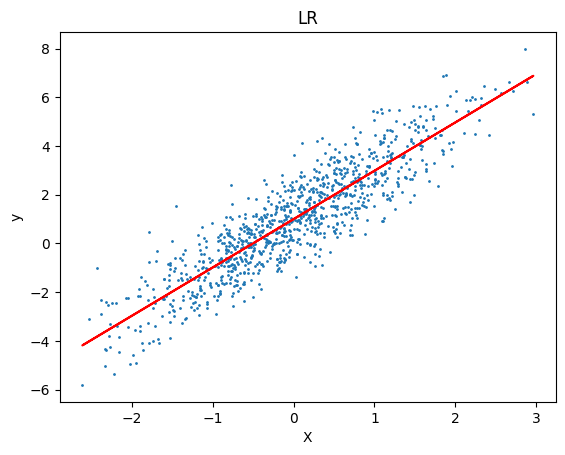

In [ ]:
#@title Sklearn LR {vertical-output: true}

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(_X, y)
y_pred = reg.predict(_X)
print("Score:", reg.score(_X, y))
print("Loss:", ((y_pred - y)**2).mean())

plt.scatter(_X, y, s=1)
plt.xlabel('X')
plt.ylabel('y')
plt.title('LR')
plt.plot(_X, y_pred, c='red')
plt.show()

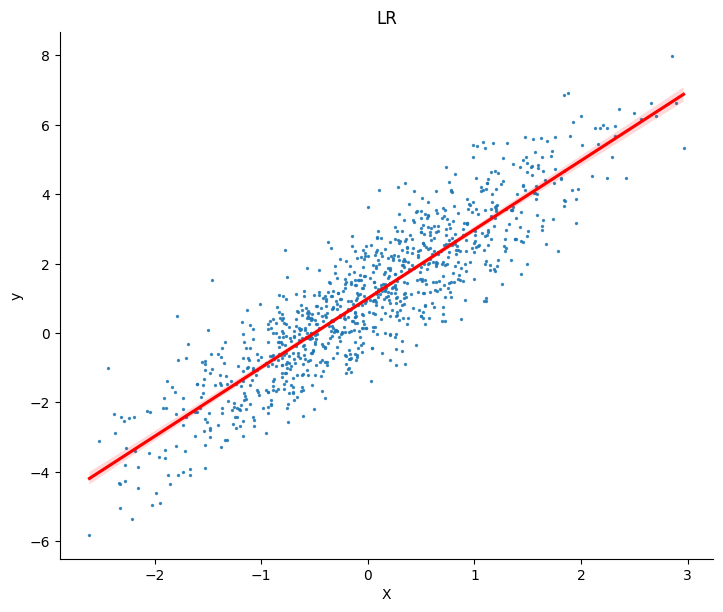

In [ ]:
#@title seaborn LR (1D for visualization only) {vertical-output: true}
import seaborn as sns
import pandas as pd

df = pd.DataFrame(np.concatenate([_X, y], axis=-1), columns=['X', 'y'])

sns.lmplot(x='X',y='y',data=df,
    aspect=2,height=6, scatter_kws={"s":2},
    line_kws={"color":"red"})
plt.gcf().set_figwidth((7))
plt.xlabel('X')
plt.ylabel('y')
plt.title('LR');

# Using Linear regression on actual datasets
In this section, we will use linear regression to predict the housing price on the California housing dataset. This dataset is provided by default on the `sample_data` folder whenever a new colab session is started.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# y = Each value corresponds to the average house value in units of 100,000
# X = Each row corresponding to the 8 feature values in order
X, y = fetch_california_housing(data_home="/content/sample_data", return_X_y=True, as_frame=True)
df = pd.read_csv("/content/sample_data/california_housing_train.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


The dataset has 17k rows with 9 columns, we use the first 8 columns as input features to predict the final column, which is the `median_house_value`.

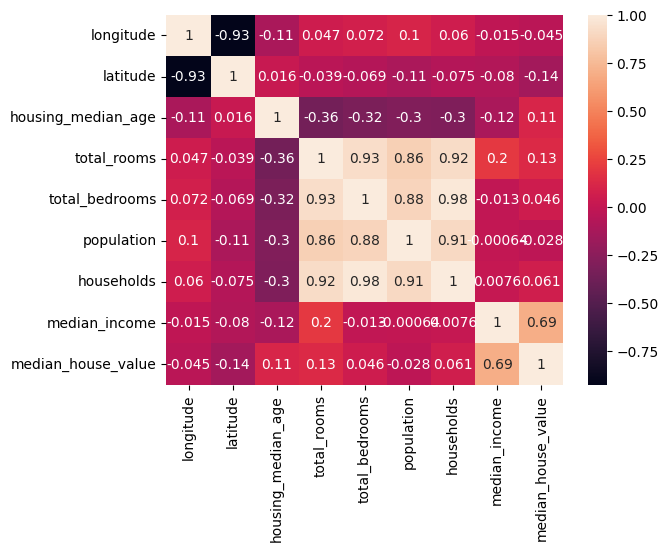

In [ ]:
#@title Correlation heatmap {vertical-output: true}
sns.heatmap(df.corr(), annot= True);

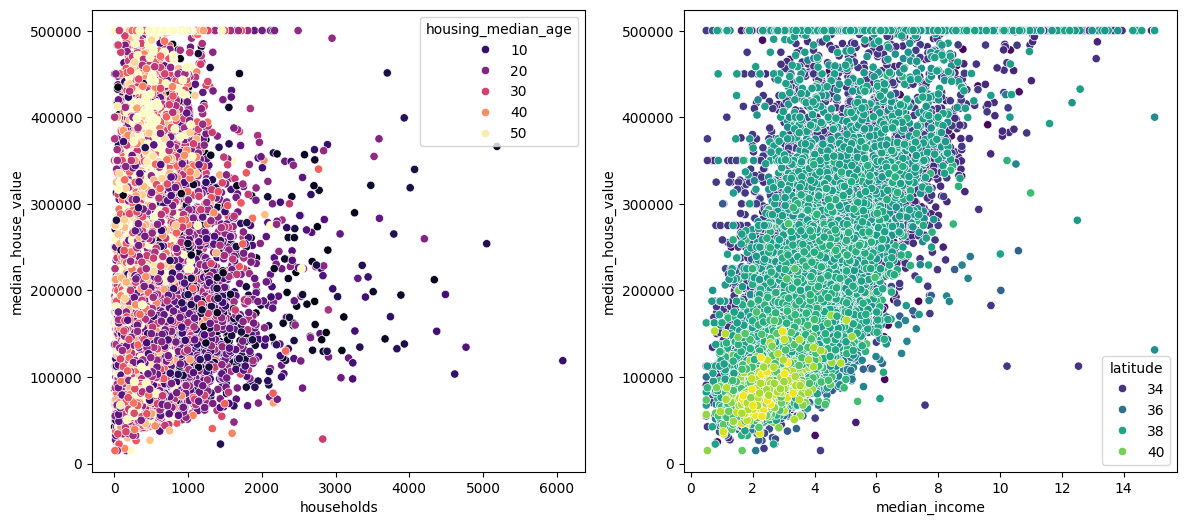

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='households',y='median_house_value',data=df,palette='magma',hue='housing_median_age',ax=ax)

ax = f.add_subplot(122)
sns.scatterplot(x='median_income',y='median_house_value',data=df,palette='viridis',hue='latitude')
plt.savefig('sc.png');

## Model building
In this step build model using our linear regression equation $w^* = (X^T X)^{-1} X^Ty$.

In [ ]:
#@title Analytic solution vs SKlearn solution {vertical-output: true}
from sklearn.model_selection import train_test_split

# y:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

X_train_pad = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=-1)
X_test_pad = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=-1)

# Analytic solution
w_star = np.linalg.inv(X_train_pad.T @ X_train_pad) @ X_train_pad.T @ y_train

# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
parameter = ['w_'+str(i) for i in range(X_train_pad.shape[1])]
columns = ['Bias:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'analytic w^*':w_star})

sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_w'))
parameter_df

,Parameter,Columns,analytic w^*,Sklearn_w
0,w_0,Bias:x_0=1,-37.285329,-37.285329
1,w_1,MedInc,0.441038,0.441038
2,w_2,HouseAge,0.009688,0.009688
3,w_3,AveRooms,-0.104781,-0.104781
4,w_4,AveBedrms,0.622053,0.622053
5,w_5,Population,-0.000006,-0.000006
6,w_6,AveOccup,-0.003288,-0.003288
7,w_7,Latitude,-0.423182,-0.423182
8,w_8,Longitude,-0.437899,-0.437899


In [ ]:
print("w^* train loss:", eval(X_train_pad, y_train, w_star))
print("w^* test loss:", eval(X_test_pad, y_test, w_star))
print("="*20)

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

print("Sklearn train loss:", ((y_train - y_pred_train)**2).mean())
print("Sklearn test loss:", ((y_test - y_pred_test)**2).mean())

w^* train loss: 0.5224237652246315
w^* test loss: 0.5296293151401488
Sklearn train loss: 0.5224237652246315
Sklearn test loss: 0.5296293151408235


# Advanced: L2 norm regularization for linear regression (ridge regression)

We add a penalty term to the weights of the linear layer to encourage the model to take small values (Oscam razor - simpler model is better)
$$w^* = \text{argmin}_{w}\|Xw - y\|_2^2 + \alpha \|w\|^2_2$$
differentiate w.r.t. w and set it to 0
\begin{align}
0 &= X^T(Xw^*-y)+\alpha w^*\\
w^* &=(X^TX+\alpha I)^{-1}X^Ty
\end{align}
Unlike the case with vanilla linear regression, the above matrix is always a positive matrix, so it is invertable even when the data matrix is deficient.

In [ ]:
#@title Analytic solution vs SKlearn solution {vertical-output: true}
alpha = 10

# Analytic solution
w_star = np.linalg.inv(
        X_train_pad.T @ X_train_pad + \
        alpha * np.eye(X_train_pad.shape[1])
        ) @ X_train_pad.T @ y_train


print("w^* train loss:", eval(X_train_pad, y_train, w_star))
print("w^* test loss:", eval(X_test_pad, y_test, w_star))
print("="*20)

from sklearn.linear_model import Ridge
clf = Ridge(alpha=alpha)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print("Sklearn train loss:", ((y_train - y_pred_train)**2).mean())
print("Sklearn test loss:", ((y_test - y_pred_test)**2).mean())

#Parameter
parameter = ['w_'+str(i) for i in range(X_train_pad.shape[1])]
columns = ['Bias:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'analytic w^*':w_star})

sk_theta = [clf.intercept_]+list(clf.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_w'))
parameter_df

w^* train loss: 0.5914719663842422
w^* test loss: 0.5948945095725499
Sklearn train loss: 0.5224298969177953
Sklearn test loss: 0.5296710611974603


,Parameter,Columns,analytic w^*,Sklearn_w
0,w_0,Bias:x_0=1,-2.906152,-37.234545
1,w_1,MedInc,0.511341,0.439754
2,w_2,HouseAge,0.015573,0.009712
3,w_3,AveRooms,-0.170252,-0.102346
4,w_4,AveBedrms,0.809819,0.609382
5,w_5,Population,0.000005,-0.000006
6,w_6,AveOccup,-0.004103,-0.003285
7,w_7,Latitude,-0.090249,-0.422901
8,w_8,Longitude,-0.048657,-0.437431


the difference between the solution of SKlearn and the derived analytic solution is that the bias term (also called intercept) in sklearn is not included in the l2 regularization. By switching the use of this bias term off, two solutions should be the same

In [ ]:
#@title Analytic solution vs SKlearn solution {vertical-output: true}
alpha = 10

try:
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
except:
    pass

# Analytic solution
w_star = np.linalg.inv(
        X_train.T @ X_train + \
        alpha * np.eye(X_train.shape[1])
        ) @ X_train.T @ y_train


print("w^* train loss:", eval(X_train, y_train, w_star))
print("w^* test loss:", eval(X_test, y_test, w_star))
print("="*20)

from sklearn.linear_model import Ridge
clf = Ridge(alpha=alpha, fit_intercept=False)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print("Sklearn train loss:", ((y_train - y_pred_train)**2).mean())
print("Sklearn test loss:", ((y_test - y_pred_test)**2).mean())

#Parameter
parameter = ['w_'+str(i) for i in range(X_train.shape[1])]
columns = list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'analytic w^*':w_star})

sk_theta = list(clf.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_w'))
parameter_df

w^* train loss: 0.6036375423290399
w^* test loss: 0.6067888503277308
Sklearn train loss: 0.6036375423290389
Sklearn test loss: 0.6067888503277078


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


,Parameter,Columns,analytic w^*,Sklearn_w
0,w_0,MedInc,0.517401,0.517401
1,w_1,HouseAge,0.016069,0.016069
2,w_2,AveRooms,-0.176001,-0.176001
3,w_3,AveBedrms,0.826788,0.826788
4,w_4,Population,0.000005,0.000005
5,w_5,AveOccup,-0.004173,-0.004173
6,w_6,Latitude,-0.062088,-0.062088
7,w_7,Longitude,-0.015744,-0.015744


This case does not have the bias, and include L2 regularization for sklearn